In [1]:
# read in sami data, pick a galaxy and get it's ra/dec/z

import astropy.io.fits as fits
import numpy as np
import pandas
from astropy.table import unique,Table,setdiff,hstack,join,QTable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import seaborn as sns
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord, angular_separation


In [5]:
jesse.info()
sami.info()


<Table length=3430>
      name       dtype     class     n_bad
--------------- ------- ------------ -----
          CATID   int64       Column     0
      CATID_EXT   int64       Column     0
  SAMI_FILENAME bytes69       Column     0
       OBS_DATE bytes21       Column     0
             RA float32       Column     0
            DEC float32       Column     0
         LMSTAR float32       Column     0
         Z_SPEC float32       Column     0
        Z_TONRY float32 MaskedColumn   984
        GMINUSI float32       Column     0
       MU_AT_RE float32 MaskedColumn   984
       GAL_FLAG float32       Column     0
       HWHM_PSF float32       Column     0
             RE float32 MaskedColumn    53
    RE_CIRC_KPC float32 MaskedColumn    53
          ELLIP float32 MaskedColumn    52
       N_SERSIC float32 MaskedColumn   108
          MTYPE float32       Column     0
      KIN_MTYPE float32       Column     0
ENV_DIST_TO_5NN float32 MaskedColumn   130
   ENV_SURFDENS float32 MaskedColu

In [21]:
print(len(list(set(jesse['CATID']))))

3071


In [23]:
print(jesse[0]['RA'])
print(jesse[0]['DEC'])

174.15315
0.815855


In [24]:
# read in HSC data I extracted
hsc_1 = Table.read('/suphys/fscu5535/HSC_work/raw_data/409962.fits')
hsc_1.info()

<Table length=1219>
        name          dtype     class     n_bad
-------------------- ------- ------------ -----
                  ra float64       Column     0
           ra_isnull    bool       Column     0
                 dec float64       Column     0
          dec_isnull    bool       Column     0
           object_id   int64       Column     0
    object_id_isnull    bool       Column     0
       r_cmodel_flux float32 MaskedColumn   211
r_cmodel_flux_isnull    bool       Column     0
        r_cmodel_mag float32 MaskedColumn   256
 r_cmodel_mag_isnull    bool       Column     0


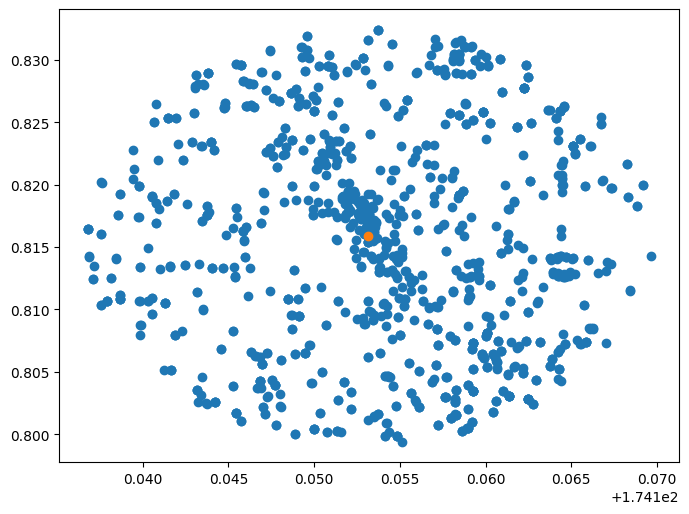

In [28]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(hsc_1['ra'],hsc_1['dec'])
plt.scatter(jesse[0]['RA'],jesse[0]['DEC'])

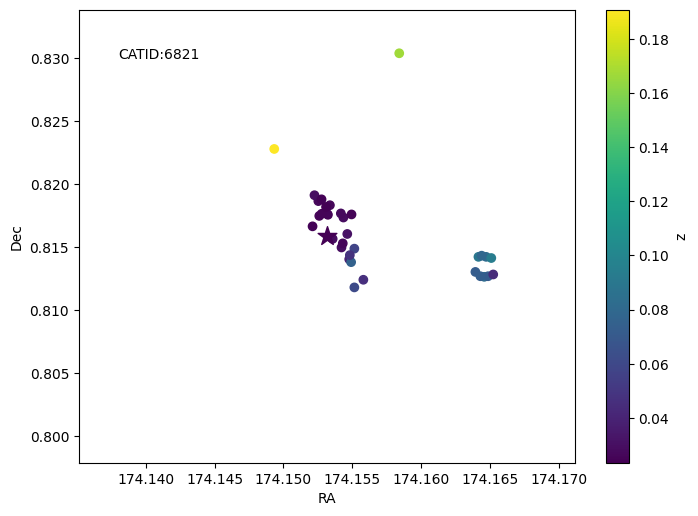

In [108]:
# now same thing but with redshift data (<0.2)
# read in data
hsc_2 = Table.read('/suphys/fscu5535/HSC_work/raw_data/testgal+z.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(hsc_2['ra'],hsc_2['dec'],c=hsc_2['photoz_median'],vmin=np.min(hsc_2['photoz_median']),vmax=np.max(hsc_2['photoz_median']))
plt.scatter(jesse[0]['RA'],jesse[0]['DEC'],c=jesse[0]['Z_SPEC'],vmin=np.min(hsc_2['photoz_median']),vmax=np.max(hsc_2['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlim(jesse[0]['RA']-0.018,jesse[0]['RA']+0.018)
plt.ylim(jesse[0]['DEC']-0.018,jesse[0]['DEC']+0.018)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.annotate('CATID:6821',(174.138,0.83))
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/testgal+zcut.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
#plt.clf()


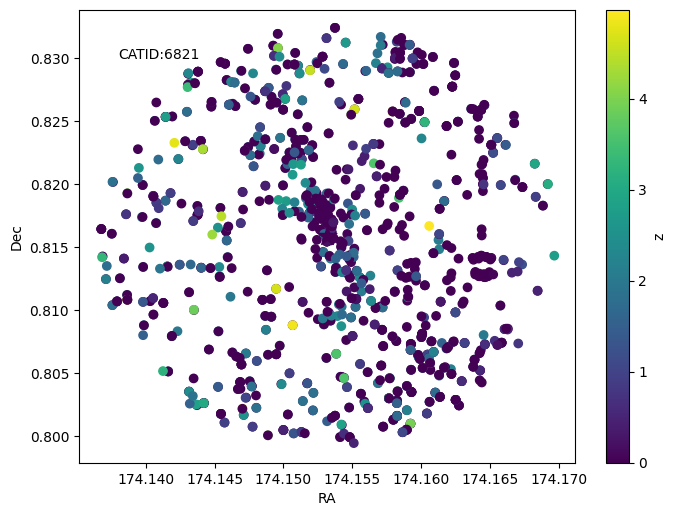

In [107]:
# now same thing but with redshift data
# read in data
hsc_3 = Table.read('/suphys/fscu5535/HSC_work/raw_data/testgal+allz.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(hsc_3['ra'],hsc_3['dec'],c=hsc_3['photoz_median'],vmin=np.min(hsc_3['photoz_median']),vmax=np.max(hsc_3['photoz_median']))
plt.scatter(jesse[0]['RA'],jesse[0]['DEC'],c=jesse[0]['Z_SPEC'],vmin=np.min(hsc_3['photoz_median']),vmax=np.max(hsc_3['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.annotate('CATID:6821',(174.138,0.83))
plt.xlim(jesse[0]['RA']-0.018,jesse[0]['RA']+0.018)
plt.ylim(jesse[0]['DEC']-0.018,jesse[0]['DEC']+0.018)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/testgal+allz.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
#plt.clf()

In [63]:
print(max(hsc_3['photoz_median']))
print(jesse[0]['Z_SPEC'])

4.9752226
0.00375


In [89]:
print(max(hsc_3['ra'])-min(hsc_3['ra']))

0.03287904952910026


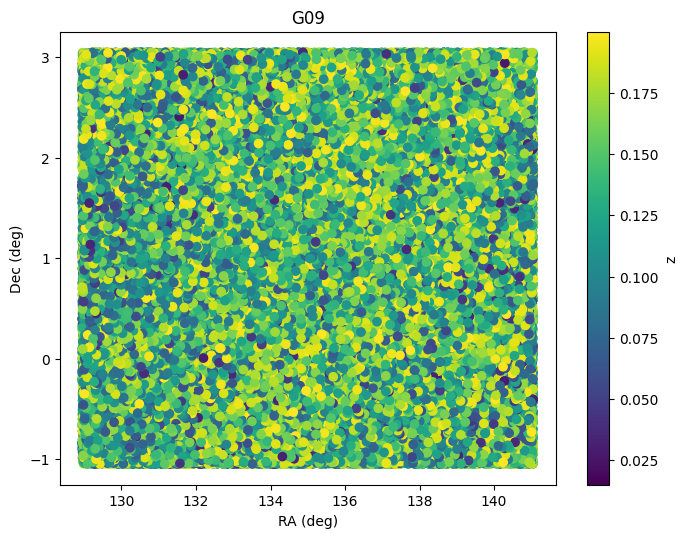

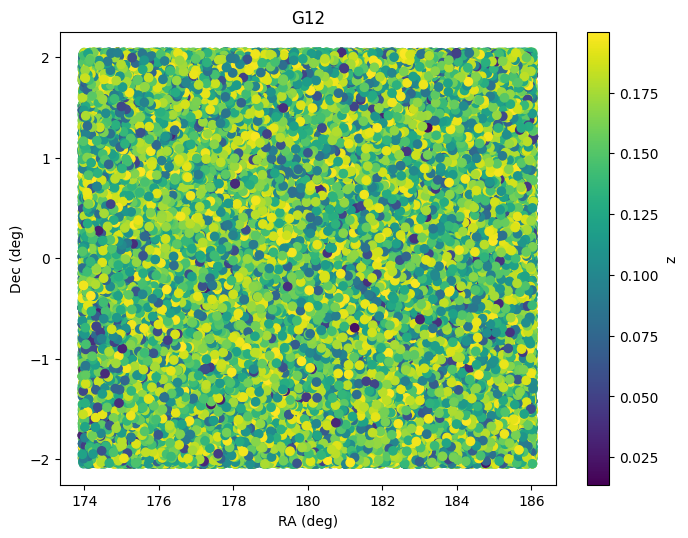

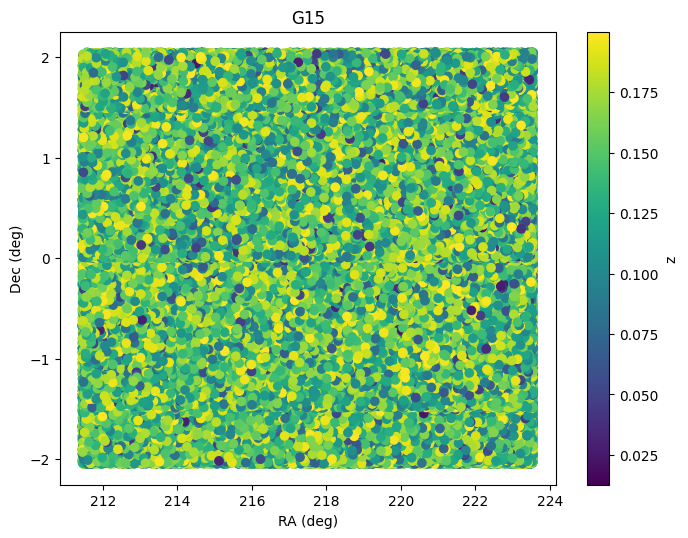

In [3]:
# looks good? now inspect other fields
G09 = Table.read('/suphys/fscu5535/HSC_work/raw_data/G09zlt0.2.fits')
G12 = Table.read('/suphys/fscu5535/HSC_work/raw_data/G12zlt0.2.fits')
G15 = Table.read('/suphys/fscu5535/HSC_work/raw_data/G15zlt0.2.fits')

#G09
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(G09['ra'],G09['dec'],c=G09['photoz_median'],vmin=np.min(G09['photoz_median']),vmax=np.max(G09['photoz_median']))
#plt.scatter(jesse[0]['RA'],jesse[0]['DEC'],c=jesse[0]['Z_SPEC'],vmin=np.min(hsc_3['photoz_median']),vmax=np.max(hsc_3['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=True,style='plain')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('G09')
cbar = plt.colorbar()
cbar.set_label('z')

#G12
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(G12['ra'],G12['dec'],c=G12['photoz_median'],vmin=np.min(G12['photoz_median']),vmax=np.max(G12['photoz_median']))
#plt.scatter(jesse[0]['RA'],jesse[0]['DEC'],c=jesse[0]['Z_SPEC'],vmin=np.min(hsc_3['photoz_median']),vmax=np.max(hsc_3['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=True,style='plain')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('G12')
cbar = plt.colorbar()
cbar.set_label('z')

#G15
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(G15['ra'],G15['dec'],c=G15['photoz_median'],vmin=np.min(G15['photoz_median']),vmax=np.max(G15['photoz_median']))
#plt.scatter(jesse[0]['RA'],jesse[0]['DEC'],c=jesse[0]['Z_SPEC'],vmin=np.min(hsc_3['photoz_median']),vmax=np.max(hsc_3['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=True,style='plain')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('G15')
cbar = plt.colorbar()
cbar.set_label('z')

In [99]:
print(jesse[0]['CATID'])

6821


In [1]:
from astropy.io import fits
hdul = fits.open('105519_HSC-i_pdr2.fits')
hdul.info()
hdul_sami = fits.open('/suphys/fscu5535/HSC_work/mod_data/G105519_SDSS_g.fits')
hdul_sami.info()

Filename: 105519_HSC-i_pdr2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   ()      
  1                1 ImageHDU        31   (361, 361)   float32   
  2                1 ImageHDU        50   (361, 361)   int32   
  3                1 ImageHDU        31   (361, 361)   float32   
Filename: /suphys/fscu5535/HSC_work/mod_data/G105519_SDSS_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   (91, 90)   float32   


In [65]:
# CATID: 105519 HSC and SAMI image
from astropy.wcs import WCS
img = hdul[1].data
plt.imshow(np.arcsinh(10*img)/3,origin = 'lower')

# save the plot
#filename = "/suphys/fscu5535/HSC_work/figures/105519image.png"
#plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
#plt.clf()

allz105519 = Table.read('/suphys/fscu5535/HSC_work/raw_data/105519allz.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(allz105519 ['ra'],allz105519 ['dec'],c=allz105519 ['photoz_median'],vmin=np.min(allz105519 ['photoz_median']),vmax=np.max(allz105519 ['photoz_median']))
plt.scatter(jesse[523]['RA'],jesse[523]['DEC'],c=jesse[523]['Z_SPEC'],vmin=np.min(allz105519 ['photoz_median']),vmax=np.max(allz105519 ['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('105519: all z, 60" search')
plt.xlim(jesse[523]['RA']-0.018,jesse[523]['RA']+0.018)
plt.ylim(jesse[523]['DEC']-0.018,jesse[523]['DEC']+0.018)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
# filename = "/suphys/fscu5535/HSC_work/figures/105519allz60arcs.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
# plt.clf()

# z < 0.2
zlt105519 = Table.read('/suphys/fscu5535/HSC_work/raw_data/105519zlt0.2.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(zlt105519 ['ra'],zlt105519 ['dec'],c=zlt105519 ['photoz_median'],vmin=np.min(zlt105519 ['photoz_median']),vmax=np.max(zlt105519 ['photoz_median']))
plt.scatter(jesse[523]['RA'],jesse[523]['DEC'],c=jesse[523]['Z_SPEC'],vmin=np.min(zlt105519['photoz_median']),vmax=np.max(zlt105519['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('105519: z < 0.2, 60" search')
plt.xlim(jesse[523]['RA']-0.018,jesse[523]['RA']+0.018)
plt.ylim(jesse[523]['DEC']-0.018,jesse[523]['DEC']+0.018)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/105519zlt0.260arcs.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
plt.clf()

# all z, 500 arcs
allz500105519 = Table.read('/suphys/fscu5535/HSC_work/raw_data/105519allz500arcs.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(allz500105519 ['ra'],allz500105519 ['dec'],c=allz500105519 ['photoz_median'],vmin=np.min(allz500105519 ['photoz_median']),vmax=np.max(allz500105519 ['photoz_median']),s=20)
plt.scatter(jesse[523]['RA'],jesse[523]['DEC'],c=jesse[523]['Z_SPEC'],vmin=np.min(allz500105519 ['photoz_median']),vmax=np.max(allz500105519 ['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('105519: all z, 500" search')
plt.xlim(jesse[523]['RA']-0.145,jesse[523]['RA']+0.145)
plt.ylim(jesse[523]['DEC']-0.145,jesse[523]['DEC']+0.145)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/105519allz500arcs.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
plt.clf()

# z < 0.2, 500 arcs
zlt500105519 = Table.read('/suphys/fscu5535/HSC_work/raw_data/105519zlt0.2500arcs.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(zlt500105519 ['ra'],zlt500105519 ['dec'],c=zlt500105519 ['photoz_median'],vmin=np.min(zlt500105519['photoz_median']),vmax=np.max(zlt500105519['photoz_median']),s=20)
plt.scatter(jesse[523]['RA'],jesse[523]['DEC'],c=jesse[523]['Z_SPEC'],vmin=np.min(zlt500105519['photoz_median']),vmax=np.max(zlt500105519['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('105519: z < 0.2, 500" search')
plt.xlim(jesse[523]['RA']-0.145,jesse[523]['RA']+0.145)
plt.ylim(jesse[523]['DEC']-0.145,jesse[523]['DEC']+0.145)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/105519zlt0.2500arcs.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
plt.clf()


<Figure size 432x288 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [64]:
# CATID: 16526 HSC and SAMI image
hdul2 = fits.open('/suphys/fscu5535/HSC_work/mod_data/16526_HSC-r_pdr2_large.fits')
img3 = hdul2[1].data

plt.imshow(np.arcsinh(10*img3)/3,origin = 'lower')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/16526image.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
plt.clf()

# z < 0.2, 60 arcs
zlt1652660arcs = Table.read('/suphys/fscu5535/HSC_work/raw_data/16526zlt0.260arcs.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(zlt1652660arcs['ra'],zlt1652660arcs['dec'],c=zlt1652660arcs['photoz_median'],vmin=np.min(zlt1652660arcs['photoz_median']),vmax=np.max(zlt1652660arcs['photoz_median']))
plt.scatter(jesse[59]['RA'],jesse[59]['DEC'],c=jesse[59]['Z_SPEC'],vmin=np.min(zlt1652660arcs['photoz_median']),vmax=np.max(zlt1652660arcs['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('CATID:16526, z < 0.2, 60" search')
plt.xlim(jesse[59]['RA']-0.075,jesse[59]['RA']+0.075)
plt.ylim(jesse[59]['DEC']-0.075,jesse[59]['DEC']+0.075)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/16526zlt0.260arcs.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
plt.clf()

# all z, 250 arcs
allz16526 = Table.read('/suphys/fscu5535/HSC_work/raw_data/16526allz250arcs.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(allz16526['ra'],allz16526 ['dec'],c=allz16526['photoz_median'],vmin=np.min(allz16526['photoz_median']),vmax=np.max(allz16526['photoz_median']))
plt.scatter(jesse[59]['RA'],jesse[59]['DEC'],c=jesse[59]['Z_SPEC'],vmin=np.min(allz16526['photoz_median']),vmax=np.max(allz16526['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('CATID:16526, all z, 250" search')
plt.xlim(jesse[59]['RA']-0.075,jesse[59]['RA']+0.075)
plt.ylim(jesse[59]['DEC']-0.075,jesse[59]['DEC']+0.075)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/16526allz250arcs.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
plt.clf()

# z < 0.2, 250 arcs
zlt16526 = Table.read('/suphys/fscu5535/HSC_work/raw_data/16526zlt0.2250arcs.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(zlt16526['ra'],zlt16526['dec'],c=zlt16526['photoz_median'],vmin=np.min(zlt16526['photoz_median']),vmax=np.max(zlt16526['photoz_median']))
plt.scatter(jesse[59]['RA'],jesse[59]['DEC'],c=jesse[59]['Z_SPEC'],vmin=np.min(zlt16526['photoz_median']),vmax=np.max(zlt16526['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('CATID:16526, z < 0.2, 250" search')
plt.xlim(jesse[59]['RA']-0.075,jesse[59]['RA']+0.075)
plt.ylim(jesse[59]['DEC']-0.075,jesse[59]['DEC']+0.075)
cbar = plt.colorbar()
cbar.set_label('z')

# save the plot
filename = "/suphys/fscu5535/HSC_work/figures/16526zlt0.2250arcs.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
plt.clf()


<Figure size 432x288 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

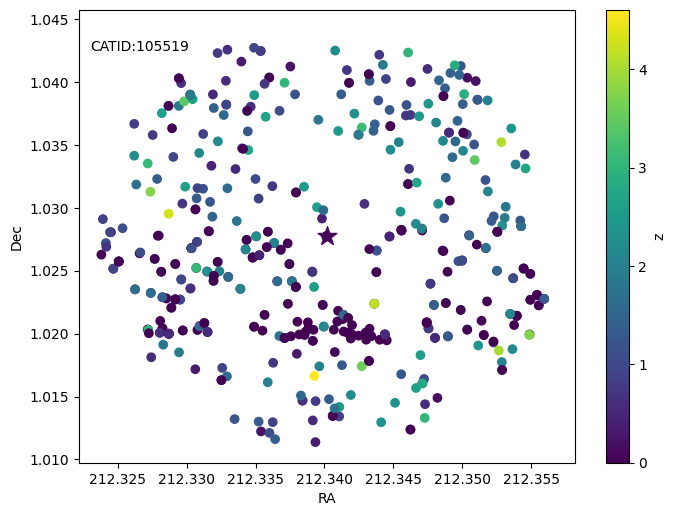

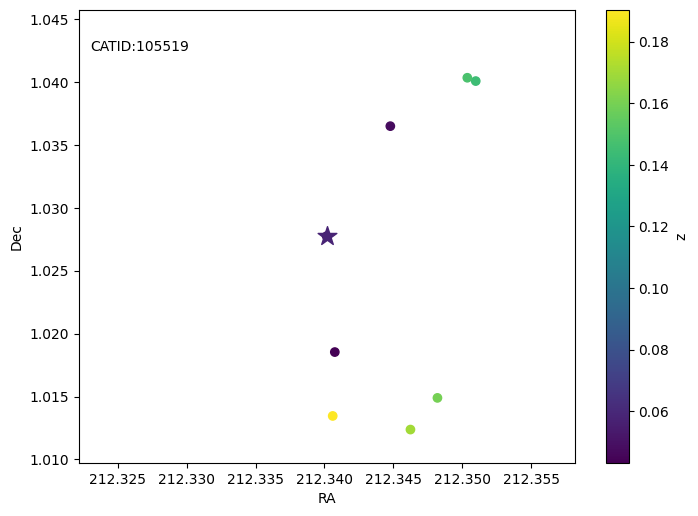

In [22]:
# HSC scatter plots for 105519:
# all z
allz105519 = Table.read('/suphys/fscu5535/HSC_work/raw_data/105519allz.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(allz105519 ['ra'],allz105519 ['dec'],c=allz105519 ['photoz_median'],vmin=np.min(allz105519 ['photoz_median']),vmax=np.max(allz105519 ['photoz_median']))
plt.scatter(jesse[523]['RA'],jesse[523]['DEC'],c=jesse[523]['Z_SPEC'],vmin=np.min(allz105519 ['photoz_median']),vmax=np.max(allz105519 ['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.annotate('CATID:105519',(212.323, 1.0425))
plt.xlim(jesse[523]['RA']-0.018,jesse[523]['RA']+0.018)
plt.ylim(jesse[523]['DEC']-0.018,jesse[523]['DEC']+0.018)
cbar = plt.colorbar()
cbar.set_label('z')

# # save the plot
# filename = "/suphys/fscu5535/HSC_work/figures/testgal+allz.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
# #plt.clf()

# z < 0.2
zlt105519 = Table.read('/suphys/fscu5535/HSC_work/raw_data/105519zlt0.2.fits')
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(zlt105519 ['ra'],zlt105519 ['dec'],c=zlt105519 ['photoz_median'],vmin=np.min(zlt105519 ['photoz_median']),vmax=np.max(zlt105519 ['photoz_median']))
plt.scatter(jesse[523]['RA'],jesse[523]['DEC'],c=jesse[523]['Z_SPEC'],vmin=np.min(zlt105519['photoz_median']),vmax=np.max(zlt105519['photoz_median']),marker="*",s=200)
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.annotate('CATID:105519',(212.323, 1.0425))
plt.xlim(jesse[523]['RA']-0.018,jesse[523]['RA']+0.018)
plt.ylim(jesse[523]['DEC']-0.018,jesse[523]['DEC']+0.018)
cbar = plt.colorbar()
cbar.set_label('z')

# # save the plot
# filename = "/suphys/fscu5535/HSC_work/figures/testgal+allz.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
# #plt.clf()

In [54]:
# get coords of 105519
for i in range(len(jesse)):
    if jesse['CATID'][i] == 105519:
        print(jesse['RA'][i])
        print(jesse['DEC'][i])
        print(i)
        
print()
print()
# get coords of 16526
for i in range(len(jesse)):
    if jesse['CATID'][i] == 16526:
        print(jesse['RA'][i])
        print(jesse['DEC'][i])
        print(i)

212.34018
1.027741
523


219.18605
0.710051
59


In [66]:
print(jesse['RE_CIRC_KPC'][0])

0.41975373


In [16]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [19]:
print(jesse['RA'][0])
print(jesse['DEC'][0])

174.15315
0.815855


In [19]:
c = SkyCoord(ra=jesse['RA'][5]*u.degree,dec=jesse['DEC'][5]*u.degree, distance=cosmo.comoving_distance(z=jesse['Z_SPEC'][5]))
c2 = SkyCoord(ra=jesse['RA'][1]*u.degree,dec=jesse['DEC'][1]*u.degree, distance=cosmo.comoving_distance(z=jesse['Z_SPEC'][1]))

In [30]:
print(c.ra)
print(c2.ra)


174d09m11.34887695s
174d18m10.00854492s


In [12]:
c.ra.hms

hms_tuple(h=11.0, m=36.0, s=36.756591796884805)

In [13]:
c.dec.hms

hms_tuple(h=0.0, m=3.0, s=15.805206298828152)

In [18]:
from astropy.cosmology import WMAP9 as cosmo
a = cosmo.comoving_distance(z=jesse['Z_SPEC'][0])
print(a)

16.204769868545608 Mpc


In [42]:
c2.distance

<Distance 315.69593106 Mpc>

In [39]:
sep = c.separation_3d(c2)

In [40]:
print(sep)

31.97971539440704 Mpc


In [37]:
315.69593-16.20477

299.49116

In [43]:
print(c)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, Mpc)
    (179.22872925, 0.72391999, 331.49582494)>


In [44]:
print(c2)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, Mpc)
    (174.30278015, 0.78998458, 315.69593106)>


In [46]:
print(a)

331.4958249449969 Mpc


In [24]:
skycoord_objects = []
skycoord_objects.append(c)
skycoord_objects.append(c2)

print(type(skycoord_objects[0]))

test_table = Table()
test_table['skycoords']=skycoord_objects

test_table.info()
test_table['skycoords'][0]

<class 'astropy.coordinates.sky_coordinate.SkyCoord'>
<Table length=2>
   name   dtype      unit     class  
--------- ------ ----------- --------
skycoords object deg,deg,Mpc SkyCoord


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, Mpc)
    (179.22872925, 0.72391999, 331.49582494)>

In [47]:
a.unit

Unit("Mpc")

In [48]:
origin = SkyCoord(ra=0*u.degree,dec=0*u.degree, distance=0*u.mpc)

In [49]:
print(origin)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (0., 0., 0.)>


In [51]:
print(c.separation_3d(origin))

331.49582494499697 Mpc


In [59]:
print(jesse['Z_SPEC'][5])

0.07798


In [4]:
# seems to be working..
G09.info()
G12.info()
G15.info()

<Table length=262911>
        name          dtype     class     n_bad 
-------------------- ------- ------------ ------
           object_id   int64       Column      0
    object_id_isnull    bool       Column      0
                  ra float64       Column      0
           ra_isnull    bool       Column      0
                 dec float64       Column      0
          dec_isnull    bool       Column      0
       photoz_median float32       Column      0
photoz_median_isnull    bool       Column      0
       r_cmodel_flux float32 MaskedColumn 105832
r_cmodel_flux_isnull    bool       Column      0
        r_cmodel_mag float32 MaskedColumn 106009
 r_cmodel_mag_isnull    bool       Column      0
<Table length=209845>
        name          dtype     class     n_bad
-------------------- ------- ------------ -----
           object_id   int64       Column     0
    object_id_isnull    bool       Column     0
                  ra float64       Column     0
           ra_isnull    bool  

In [26]:
G09_hsc = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_hsc_1.1.fits')
G09_hsc.info()

<Table length=800701>
            name             dtype      unit       class     n_bad 
--------------------------- ------- ----------- ------------ ------
                  object_id   int64             MaskedColumn      0
                   SkyCoord  object deg,deg,Mpc     SkyCoord      0
           object_id_isnull    bool                   Column      0
                         ra float64                   Column      0
                  ra_isnull    bool                   Column      0
                        dec float64                   Column      0
                 dec_isnull    bool                   Column      0
              photoz_median float32                   Column      0
       photoz_median_isnull    bool                   Column      0
              i_psfflux_mag float32             MaskedColumn   6066
       i_psfflux_mag_isnull    bool                   Column      0
              r_psfflux_mag float32             MaskedColumn  12178
       r_psfflux_mag_isnul

In [32]:
for i in range(len(G09_hsc)):
    if G09_hsc['object_type'][i] == 's':
        print("uhoh!")

print("done checking")

done checking


In [8]:
# generate some plots of our data set

G09all = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_1.0.fits')
G09all.info()

<Table length=1026488>
            name             dtype     class     n_bad 
--------------------------- ------- ------------ ------
                  object_id   int64 MaskedColumn      0
           object_id_isnull    bool       Column      0
                         ra float64       Column      0
                  ra_isnull    bool       Column      0
                        dec float64       Column      0
                 dec_isnull    bool       Column      0
              photoz_median float32       Column      0
       photoz_median_isnull    bool       Column      0
              i_psfflux_mag float32 MaskedColumn   6600
       i_psfflux_mag_isnull    bool       Column      0
              r_psfflux_mag float32 MaskedColumn  15753
       r_psfflux_mag_isnull    bool       Column      0
             r_kronflux_mag float32 MaskedColumn  24950
      r_kronflux_mag_isnull    bool       Column      0
             i_kronflux_mag float32 MaskedColumn  21668
      i_kronflux_mag_isnu

In [9]:
# plot extendedness values hist for each object type

star_ids = []
gal_ids = []
unk_ids = []

for i in range(len(G09all)):
    
    if G09all['object_type'][i] == 's':
        star_ids.append(G09all['object_id'][i])  
        
    if G09all['object_type'][i] == 'g':
        gal_ids.append(G09all['object_id'][i])  
        
    if G09all['object_type'][i] == 'u':
        unk_ids.append(G09all['object_id'][i])
        
star_table = Table()
star_table['object_id'] = star_ids
star_table = join(star_table,G09all,keys='object_id',join_type='left')
star_table.write('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_stars.fits')

print("stars done")

gal_table = Table()
gal_table['object_id'] = gal_ids
gal_table = join(gal_table,G09all,keys='object_id',join_type='left')
gal_table.write('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')

print("galaxies done")

unk_table = Table()
unk_table['object_id'] = unk_ids
unk_table = join(unk_table,G09all,keys='object_id',join_type='left')
unk_table.write('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_unknowns.fits')

print("unknowns done")
                   

stars done
galaxies done
unknowns done


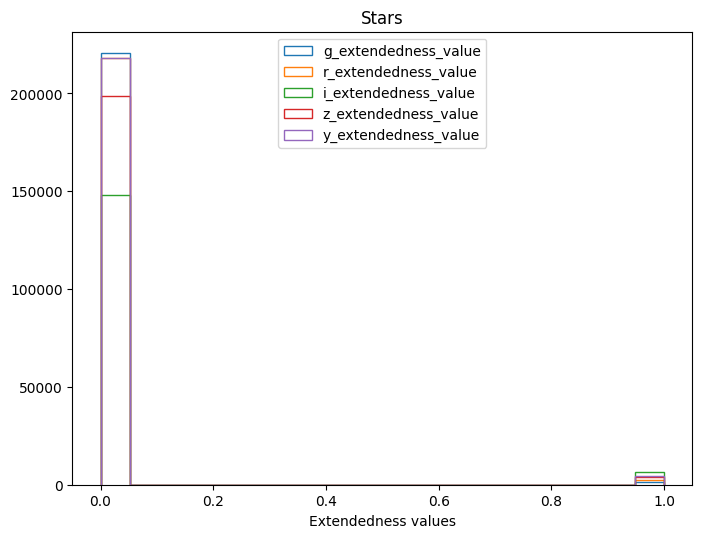

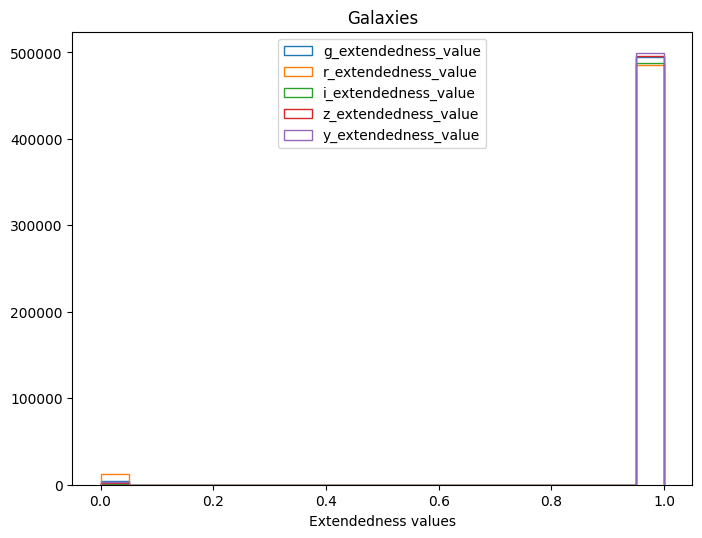

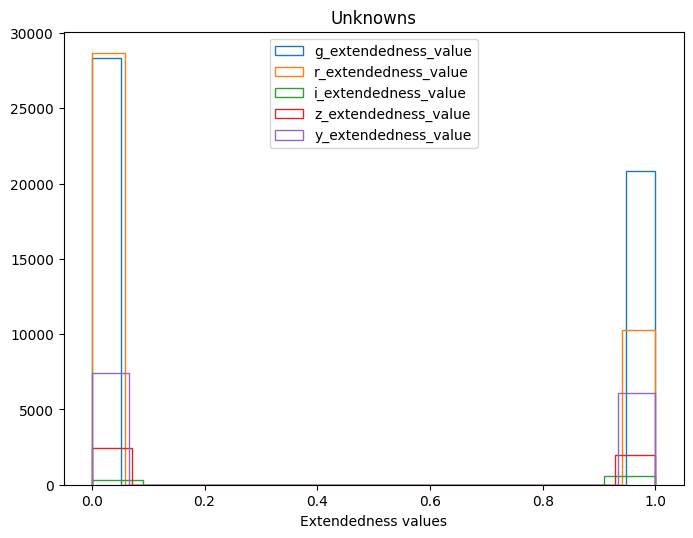

In [3]:
stars = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_stars.fits')
gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')
unks = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_unknowns.fits')

filters = ['g_extendedness_value','r_extendedness_value','i_extendedness_value'
          ,'z_extendedness_value','y_extendedness_value']

objects = [stars,gals,unks]
titles = ['Stars','Galaxies','Unknowns']

for i,j in zip(objects,titles):
    
    plt.figure(figsize=(8,6),dpi=100)
    plt.title(j)
    plt.xlabel("Extendedness values")
    
    for k in filters:
        plt.hist(i[k],bins='auto',histtype='step', fill=False, label=k)
    
    plt.legend(loc='upper center')
    plt.show()
    
    

In [29]:
# so unknowns are most (least) complete in g,r (i,z) filters
unks['i_extendedness_value'][0].mask

()

Text(0, 0.5, 'Count')

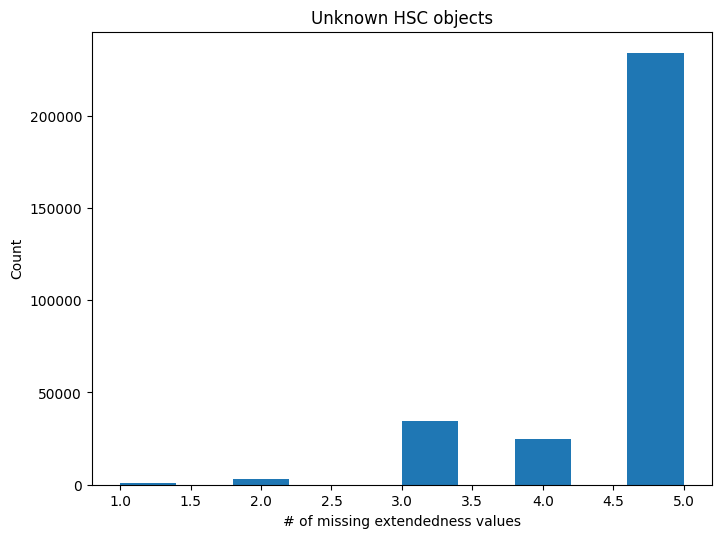

In [77]:
# plot number of missing values for unknowns and what filters

filters = ['g_extendedness_value','r_extendedness_value','i_extendedness_value'
          ,'z_extendedness_value','y_extendedness_value']

counts = []

for i in range(len(unks)):
    
    count = 0
    
    for j in filters:
        if unks.mask[j][i] == True:
            count +=1
    
    counts.append(count)
    
plt.figure(figsize=(8,6),dpi=100)
plt.hist(counts)
plt.title("Unknown HSC objects")
plt.xlabel("# of missing extendedness values")
plt.ylabel("Count")
    
    
    
    

In [12]:
i_kron = []
r_kron = []
i_psf = []
r_psf = []


for i in range(len(unks)):
    if unks['r_kronflux_mag'][i] > 100:
        r_kron.append(np.ma.masked)
    else:
        r_kron.append(unks['r_kronflux_mag'][i])
    if unks['i_kronflux_mag'][i] > 100:
        i_kron.append(np.ma.masked)
    else:
        i_kron.append(unks['i_kronflux_mag'][i])
    if unks['i_psfflux_mag'][i] > 100:
        i_psf.append(np.ma.masked)
    else:
        i_psf.append(unks['i_psfflux_mag'][i])
    if unks['r_psfflux_mag'][i] > 100:
        r_psf.append(np.ma.masked)
    else:
        r_psf.append(unks['r_psfflux_mag'][i])


Fraction of missing r_kron mags: 0.09742118414051819


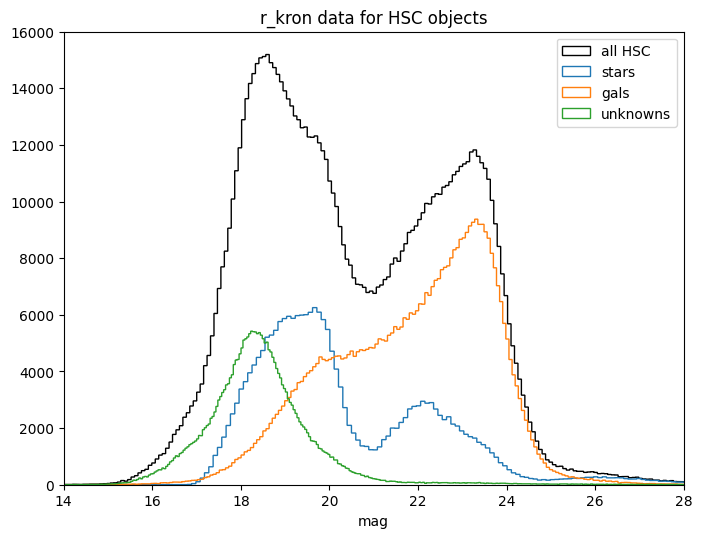

In [14]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('r_kron data for HSC objects')
plt.hist(r_kron_all,label='all HSC',bins='auto',histtype='step', fill=False,color='k')
plt.hist(r_kron_star,label='stars',bins='auto',histtype='step', fill=False)
plt.hist(r_kron_gal,label='gals',bins='auto',histtype='step', fill=False)
plt.hist(r_kron,label='unknowns',bins='auto',histtype='step', fill=False)
plt.xlabel("mag")
plt.xlim(14,28)
plt.ylim(0,16000)
plt.legend()

count = 0
for i in range(len(unks)):
    if unks.mask['r_kronflux_mag'][i] == True or unks['r_kronflux_mag'][i] < 0.5:
        count += 1

print("Fraction of missing r_kron mags:",count/len(unks))

Fraction of missing r_psf mags: 0.05769502757965773


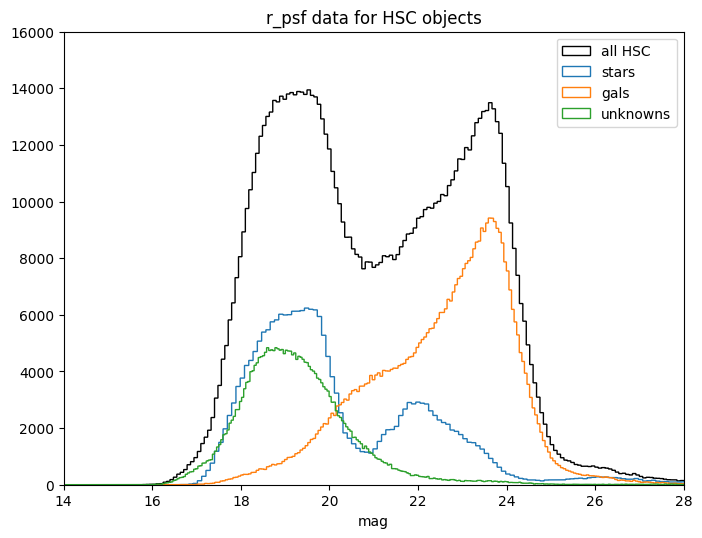

In [13]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('r_psf data for HSC objects')
plt.hist(r_psf_all,label='all HSC',bins='auto',histtype='step', fill=False,color='k')
plt.hist(r_psf_star,label='stars',bins='auto',histtype='step', fill=False)
plt.hist(r_psf_gal,label='gals',bins='auto',histtype='step', fill=False)
plt.hist(r_psf,label='unknowns',bins='auto',histtype='step', fill=False)
plt.xlabel("mag")
plt.xlim(14,28)
plt.ylim(0,16000)
plt.legend()

count = 0
for i in range(len(unks)):
    if unks.mask['r_psfflux_mag'][i] == True or unks['r_psfflux_mag'][i] < 0.5:
        count += 1

print("Fraction of missing r_psf mags:",count/len(unks))

In [4]:
count = 0
for i in range(len(unks)):
    if unks.mask['r_psfflux_mag'][i] == True:
        count += 1

print("Fraction of missing r_psf mags:",count/len(unks))

Fraction of missing r_psf mags: 0.025939695175748758


In [11]:
i_kron_gal = []
r_kron_gal = []
i_psf_gal = []
r_psf_gal = []


for i in range(len(gals)):
    if gals['r_kronflux_mag'][i] > 100:
        r_kron_gal.append(np.ma.masked)
    else:
        r_kron_gal.append(gals['r_kronflux_mag'][i])
    if gals['i_kronflux_mag'][i] > 100:
        i_kron_gal.append(np.ma.masked)
    else:
        i_kron_gal.append(gals['i_kronflux_mag'][i])
    if gals['i_psfflux_mag'][i] > 100:
        i_psf_gal.append(np.ma.masked)
    else:
        i_psf_gal.append(gals['i_psfflux_mag'][i])
    if gals['r_psfflux_mag'][i] > 100:
        r_psf_gal.append(np.ma.masked)
    else:
        r_psf_gal.append(gals['r_psfflux_mag'][i])
        

        
i_kron_star = []
r_kron_star = []
i_psf_star = []
r_psf_star = []


for i in range(len(stars)):
    if stars['r_kronflux_mag'][i] > 100:
        r_kron_star.append(np.ma.masked)
    else:
        r_kron_star.append(stars['r_kronflux_mag'][i])
    if stars['i_kronflux_mag'][i] > 100:
        i_kron_star.append(np.ma.masked)
    else:
        i_kron_star.append(stars['i_kronflux_mag'][i])
    if stars['i_psfflux_mag'][i] > 100:
        i_psf_star.append(np.ma.masked)
    else:
        i_psf_star.append(stars['i_psfflux_mag'][i])
    if stars['r_psfflux_mag'][i] > 100:
        r_psf_star.append(np.ma.masked)
    else:
        r_psf_star.append(stars['r_psfflux_mag'][i])

In [9]:
i_kron_all = []
r_kron_all = []
i_psf_all = []
r_psf_all = []


for i in range(len(G09all)):
    if G09all['r_kronflux_mag'][i] > 100:
        r_kron_all.append(np.ma.masked)
    else:
        r_kron_all.append(G09all['r_kronflux_mag'][i])
    if G09all['i_kronflux_mag'][i] > 100:
        i_kron_all.append(np.ma.masked)
    else:
        i_kron_all.append(G09all['i_kronflux_mag'][i])
    if G09all['i_psfflux_mag'][i] > 100:
        i_psf_all.append(np.ma.masked)
    else:
        i_psf_all.append(G09all['i_psfflux_mag'][i])
    if G09all['r_psfflux_mag'][i] > 100:
        r_psf_all.append(np.ma.masked)
    else:
        r_psf_all.append(G09all['r_psfflux_mag'][i])

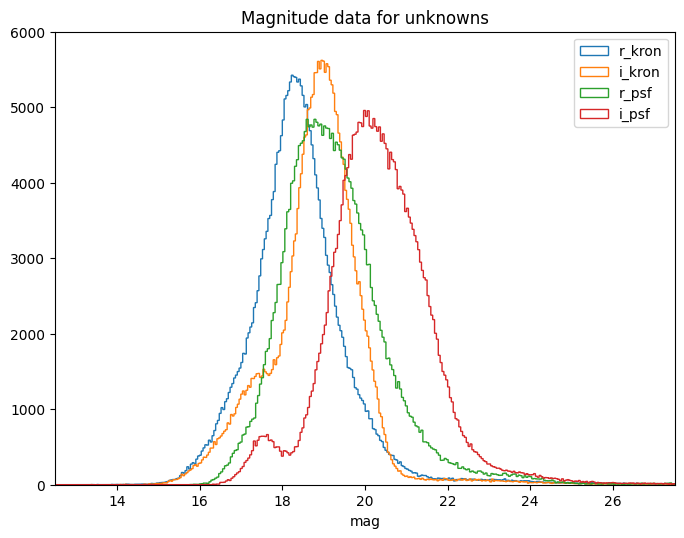

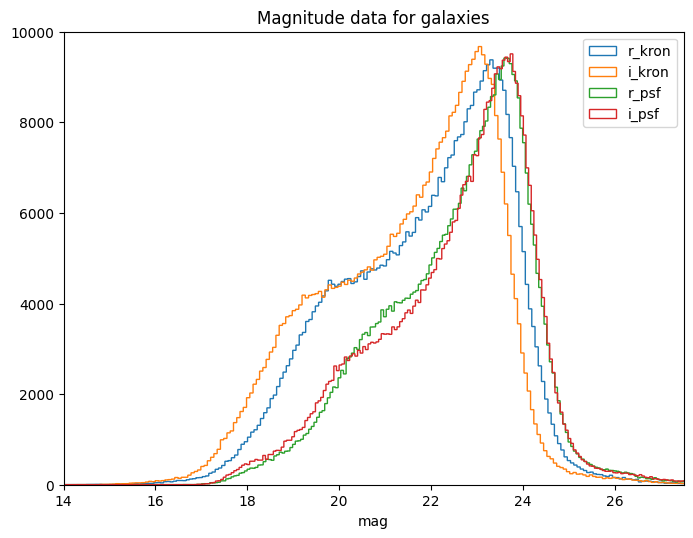

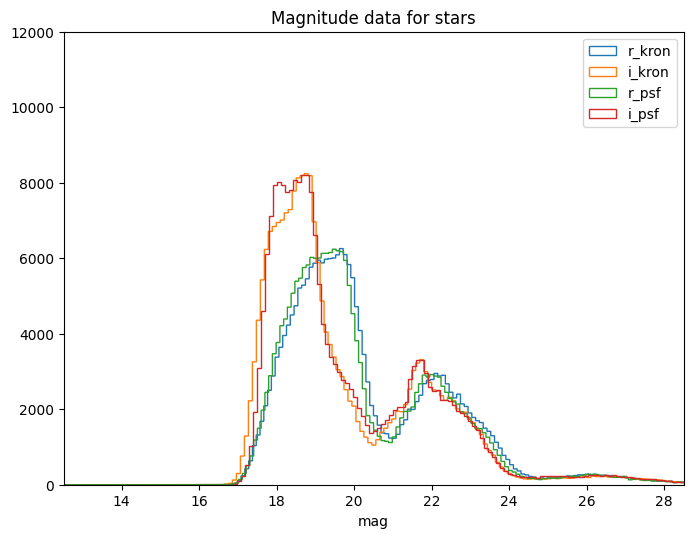

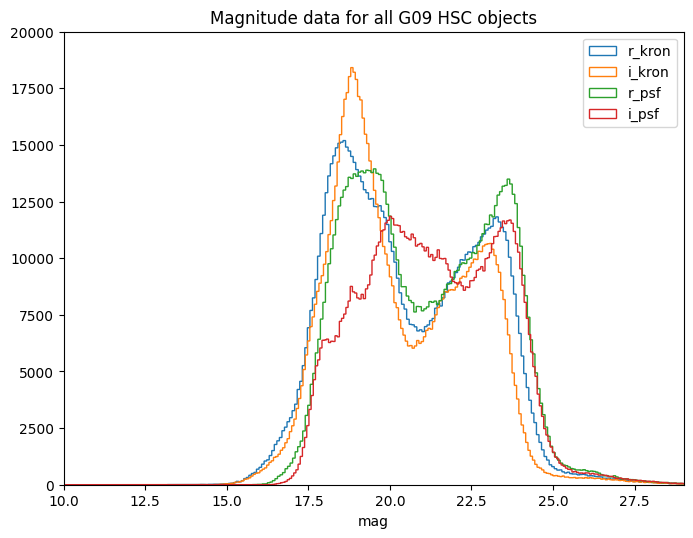

In [76]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('Magnitude data for unknowns')
plt.hist(r_kron,label='r_kron',bins='auto',histtype='step', fill=False)
plt.hist(i_kron,label='i_kron',bins='auto',histtype='step', fill=False)
plt.hist(r_psf,label='r_psf',bins='auto',histtype='step', fill=False)
plt.hist(i_psf,label='i_psf',bins='auto',histtype='step', fill=False)
plt.xlabel("mag")
plt.xlim(12.5,27.5)
plt.ylim(0,6000)
plt.legend()

plt.figure(figsize=(8,6),dpi=100)
plt.title('Magnitude data for galaxies')
plt.hist(r_kron_gal,label='r_kron',bins='auto',histtype='step', fill=False)
plt.hist(i_kron_gal,label='i_kron',bins='auto',histtype='step', fill=False)
plt.hist(r_psf_gal,label='r_psf',bins='auto',histtype='step', fill=False)
plt.hist(i_psf_gal,label='i_psf',bins='auto',histtype='step', fill=False)
plt.xlabel("mag")
plt.xlim(14,27.5)
plt.ylim(0,10000)
plt.legend()

plt.figure(figsize=(8,6),dpi=100)
plt.title('Magnitude data for stars')
plt.hist(r_kron_star,label='r_kron',bins='auto',histtype='step', fill=False)
plt.hist(i_kron_star,label='i_kron',bins='auto',histtype='step', fill=False)
plt.hist(r_psf_star,label='r_psf',bins='auto',histtype='step', fill=False)
plt.hist(i_psf_star,label='i_psf',bins='auto',histtype='step', fill=False)
plt.xlabel("mag")
plt.xlim(12.5,28.5)
plt.ylim(0,12000)
plt.legend()

plt.figure(figsize=(8,6),dpi=100)
plt.title('Magnitude data for all G09 HSC objects')
plt.hist(r_kron_all,label='r_kron',bins='auto',histtype='step', fill=False)
plt.hist(i_kron_all,label='i_kron',bins='auto',histtype='step', fill=False)
plt.hist(r_psf_all,label='r_psf',bins='auto',histtype='step', fill=False)
plt.hist(i_psf_all,label='i_psf',bins='auto',histtype='step', fill=False)
plt.xlabel("mag")
plt.xlim(10,29)
plt.ylim(0,20000)
plt.legend()

In [2]:
gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')
gals.info()


<Table length=503743>
            name             dtype     class     n_bad
--------------------------- ------- ------------ -----
                  object_id   int64 MaskedColumn     0
           object_id_isnull    bool       Column     0
                         ra float64       Column     0
                  ra_isnull    bool       Column     0
                        dec float64       Column     0
                 dec_isnull    bool       Column     0
              photoz_median float32       Column     0
       photoz_median_isnull    bool       Column     0
              i_psfflux_mag float32 MaskedColumn   612
       i_psfflux_mag_isnull    bool       Column     0
              r_psfflux_mag float32 MaskedColumn  4475
       r_psfflux_mag_isnull    bool       Column     0
             r_kronflux_mag float32 MaskedColumn  3261
      r_kronflux_mag_isnull    bool       Column     0
             i_kronflux_mag float32 MaskedColumn  1934
      i_kronflux_mag_isnull    bool       C

In [5]:
gals = QTable(gals)
gals['ra'] = gals['ra']*u.deg
gals['dec'] = gals['dec']*u.deg
gals.info()

<QTable length=503743>
            name             dtype  unit    class     n_bad
--------------------------- ------- ---- ------------ -----
                  object_id   int64      MaskedColumn     0
           object_id_isnull    bool            Column     0
                         ra float64  deg     Quantity     0
                  ra_isnull    bool            Column     0
                        dec float64  deg     Quantity     0
                 dec_isnull    bool            Column     0
              photoz_median float32            Column     0
       photoz_median_isnull    bool            Column     0
              i_psfflux_mag float32      MaskedColumn   612
       i_psfflux_mag_isnull    bool            Column     0
              r_psfflux_mag float32      MaskedColumn  4475
       r_psfflux_mag_isnull    bool            Column     0
             r_kronflux_mag float32      MaskedColumn  3261
      r_kronflux_mag_isnull    bool            Column     0
             i_kr

In [6]:
gals.write('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits',overwrite=True)

In [7]:
sami = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.1.fits')
sami.info()

<Table length=676>
    name     dtype      unit       class     n_bad
----------- ------- ----------- ------------ -----
      CATID   int64             MaskedColumn     0
   SkyCoord  object deg,deg,Mpc     SkyCoord     0
         RA float32                   Column     0
        DEC float32                   Column     0
     Z_SPEC float32                   Column     0
RE_CIRC_KPC float64             MaskedColumn    18
      ELLIP float64             MaskedColumn    18
 LAMBDAR_RE float64             MaskedColumn   286


In [10]:
sami.remove_column('SkyCoord')

In [11]:
sami.info()

<Table length=676>
    name     dtype     class     n_bad
----------- ------- ------------ -----
      CATID   int64 MaskedColumn     0
         RA float32       Column     0
        DEC float32       Column     0
     Z_SPEC float32       Column     0
RE_CIRC_KPC float64 MaskedColumn    18
      ELLIP float64 MaskedColumn    18
 LAMBDAR_RE float64 MaskedColumn   286


In [22]:
sami = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.2.fits')
sami.info()

ang_diam_dist = np.zeros(len(sami))

for i in range(len(sami)):
    ang_diam_dist[i] = cosmo.angular_diameter_distance(sami['Z_SPEC'][i]).value
    

<Table length=676>
    name     dtype  unit    class     n_bad
----------- ------- ---- ------------ -----
      CATID   int64      MaskedColumn     0
         RA float32  deg       Column     0
        DEC float32  deg       Column     0
     Z_SPEC float32            Column     0
RE_CIRC_KPC float64      MaskedColumn    18
      ELLIP float64      MaskedColumn    18
 LAMBDAR_RE float64      MaskedColumn   286


In [48]:
sami = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.2.fits')
sami.info()

sami['RA_RAD'] = sami['RA']*(np.pi/180)*u.rad/u.deg
sami['DEC_RAD'] = sami['DEC']*(np.pi/180)*u.rad/u.deg
sami.info()

print(sami['RA'][0])
print(sami['RA_RAD'][0])

<Table length=676>
    name     dtype  unit    class     n_bad
----------- ------- ---- ------------ -----
      CATID   int64      MaskedColumn     0
         RA float32  deg       Column     0
        DEC float32  deg       Column     0
     Z_SPEC float32            Column     0
RE_CIRC_KPC float64      MaskedColumn    18
      ELLIP float64      MaskedColumn    18
 LAMBDAR_RE float64      MaskedColumn   286
<Table length=676>
    name     dtype  unit    class     n_bad
----------- ------- ---- ------------ -----
      CATID   int64      MaskedColumn     0
         RA float32  deg       Column     0
        DEC float32  deg       Column     0
     Z_SPEC float32            Column     0
RE_CIRC_KPC float64      MaskedColumn    18
      ELLIP float64      MaskedColumn    18
 LAMBDAR_RE float64      MaskedColumn   286
     RA_RAD float32  rad       Column     0
    DEC_RAD float32  rad       Column     0
135.20729
2.3598123


In [50]:
sami['ang_diam_dist'] = ang_diam_dist*u.Mpc*1/u.rad
sami.rename_column('ang_diam_dist','ANG_DIAM_DIST')
sami.info()

<Table length=676>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn    18
        ELLIP float64           MaskedColumn    18
   LAMBDAR_RE float64           MaskedColumn   286
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0


In [51]:
sami.write('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits',overwrite=True)
sami.info()

<Table length=676>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn    18
        ELLIP float64           MaskedColumn    18
   LAMBDAR_RE float64           MaskedColumn   286
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0


In [27]:
sami['ANG_DIAM_DIST'][0]

167.36615274377542

In [37]:
# test again on small sample, this time save in numpy array

# read in definite galaxies, just work with these for now..
HSC_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')

# sami gals
SAMI_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits')

# use numpy arrays over lists of lists
# look at astropy tables
# run as a script not through jupyter!


CATIDS = np.zeros(len(SAMI_G09_gals))
RE_CIRC_KPC = np.zeros(len(SAMI_G09_gals))
object_ids = np.zeros((len(SAMI_G09_gals),50000))
distances = np.zeros((len(SAMI_G09_gals),50000))
index = 0

for i in range(0,2):
    ang_diam_1rad = SAMI_G09_gals['ANG_DIAM_DIST'][i]
    CATIDS[i] = SAMI_G09_gals['CATID'][i]
    RE_CIRC_KPC[i] = SAMI_G09_gals['RE_CIRC_KPC'][i]
    
    for j in range(len(HSC_G09_gals)):       
        ang_sep = angular_separation(SAMI_G09_gals['RA_RAD'][i],SAMI_G09_gals['DEC_RAD'][i],
                            HSC_G09_gals['ra'][j],HSC_G09_gals['dec'][j])
        sep = ang_sep*ang_diam_1rad
    
        if sep < 1*u.Mpc:
            object_ids[i][j] = HSC_G09_gals['object_id'][j]
            distances[i][j] = sep
            
    index += 1
    print(i,"/",len(SAMI_G09_gals),"done")
    
chunk = QTable()
chunk['CATID'] = CATIDS
chunk['RE_CIRC_KPC'] = RE_CIRC_KPC
chunk['OBJECT_ID'] = object_ids
chunk['DISTANCE'] = distances

chunk.write('/suphys/fscu5535/HSC_work/mod_data/chunk1test.fits')


UnitConversionError: Can only apply 'greater' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [30]:
np.zeros((2,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [43]:
print(sep)

302.8444931347942


In [39]:
ang_sep

1.8094727528237182

In [40]:
ang_diam_1rad

167.36615274377542

In [42]:
ang_sep = angular_separation(SAMI_G09_gals['RA_DEC'][i]*u.deg,SAMI_G09_gals['DEC'][i]*u.deg,
                            HSC_G09_gals['ra'][j]*u.deg,HSC_G09_gals['dec'][j]*u.deg)
print(ang_sep)     

0.11891235290918069 rad
